# Péndulos acoplados

Federico Cerisola (cerisola@df.uba.ar)

Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from matplotlib import animation, rc
from IPython.display import HTML
import ipywidgets as widgets

#rc('animation', html='jshtml')
rc('animation', html='html5')
rc('animation', bitrate='120')

In [ ]:
def calculo_modos_normales(mA, mB, k, l, g=9.8):
    omega1 = np.sqrt(g/l)
    omega2 = np.sqrt(g/l + k*(mA + mB)/(mA*mB))
    v1 = np.array([1, 1])
    v2 = np.array([1, -mA/mB])
    return (omega1, v1), (omega2, v2)


def calculo_ci(psiA0, psiB0, velA0, velB0, modos):
    (omega1, v1), (omega2, v2) = modos
    A = np.array([[v1[0], 0, v2[0], 0],
                  [v1[1], 0, v2[1], 0],
                  [0, omega1*v1[0], 0, omega2*v2[0]],
                  [0, omega1*v1[1], 0, omega2*v2[1]]])
    d = np.array([psiA0, psiB0, velA0, velB0])
    Amplitudes = linalg.solve(A, d)
    C1 = np.sqrt(Amplitudes[0]**2 + Amplitudes[1]**2)
    C2 = np.sqrt(Amplitudes[2]**2 + Amplitudes[3]**2)
    phi1 = np.arctan2(-Amplitudes[1], Amplitudes[0])
    phi2 = np.arctan2(-Amplitudes[3], Amplitudes[2])
    return (C1, phi1), (C2, phi2)
    #return ((Amplitudes[0], Amplitudes[1]), (Amplitudes[2], Amplitudes[3]))


def funciones_posicion_masas(modos, CI):
    (omega1, v1), (omega2, v2) = modos
    (C1, phi1), (C2, phi2) = CI

    psiA = lambda t: v1[0]*C1*np.cos(omega1*t + phi1) + v2[0]*C2*np.cos(omega2*t + phi2)
    psiB = lambda t: v1[1]*C1*np.cos(omega1*t + phi1) + v2[1]*C2*np.cos(omega2*t + phi2)
    return psiA, psiB

In [ ]:
def graficar_soluciones(tmax, mA, mB, k, l, psiA0, psiB0, velA0, velB0, g=9.8):
    modos = calculo_modos_normales(mA, mB, k, l, g=g)
    CI = calculo_ci(psiA0, psiB0, velA0, velB0, modos)
    psiA, psiB = funciones_posicion_masas(modos, CI)

    t = np.linspace(0, tmax, 4000)

    plt.figure(figsize=(9,5))
    plt.plot(t, psiA(t), label='$\psi_{A}$')
    plt.plot(t, psiB(t), label='$\psi_{B}$')
    plt.xlabel('$t$')
    plt.ylabel('Desplazamiento')
    plt.grid()
    plt.legend()
    plt.show()

### Widget inetractivo 1: Gráfico desplazamientos para distintas condiciones iniciales / parámetros

In [ ]:
# creamos widget iteractivo
widgets.interact(graficar_soluciones,
                tmax=widgets.FloatSlider(min=0, max=500, step=1, value=100),
                mA=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                mB=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                k=widgets.FloatSlider(min=0, max=10, step=0.1, value=0.5),
                l=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                psiA0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=1),
                psiB0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=0),
                velA0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=0),
                velB0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=0))

In [ ]:
def animacion_soluciones(tmax, mA, mB, k, l, psiA0, psiB0, velA0, velB0, g=9.8):
    modos = calculo_modos_normales(mA, mB, k, l, g=g)
    CI = calculo_ci(psiA0, psiB0, velA0, velB0, modos)
    psiA, psiB = funciones_posicion_masas(modos, CI)

    t = np.linspace(0, tmax, 300)
    psiAt = psiA(t)
    psiBt = psiB(t)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    ax1.set_xlim([0, tmax])
    ax1.set_ylim([np.min([psiAt, psiBt]), np.max([psiAt, psiBt])])
    lineA, = ax1.plot([], [], label='$\psi_{A}$')
    lineB, = ax1.plot([], [], label='$\psi_{A}$')
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('Despalazamiento')
    
    L = np.max([psiAt, psiBt])
    posEqA = L
    posEqB = 3*L
    ax2.set_xlim([0, 4*L])
    ax2.set_ylim([0, 1])
    lineTecho, = ax2.plot([0, 4*L], [0.9, 0.9], '-', color='black', linewidth=3.0)
    linePendA, = ax2.plot([posEqA, posEqA], [0.9, 0.1], '-', color='C0', linewidth=2.0)
    linePendB, = ax2.plot([posEqB, posEqB], [0.9, 0.1], '-', color='C1', linewidth=2.0)
    lineResor, = ax2.plot([posEqA, posEqB], [0.1, 0.1], '--', color='gray', linewidth=1.5)
    masaPendA, = ax2.plot([posEqA], [0.1], 'o', color='C0', markersize=10.0)
    masaPendB, = ax2.plot([posEqB], [0.1], 'o', color='C1', markersize=10.0)
    
    def init():
        lineA.set_data([], [])
        lineB.set_data([], [])
        linePendA.set_xdata([posEqA, posEqA])
        linePendB.set_xdata([posEqB, posEqB])
        lineResor.set_xdata([posEqA, posEqB])
        masaPendA.set_xdata([posEqA])
        masaPendB.set_xdata([posEqB])
        return lineA, lineB, linePendA, linePendB, masaPendA, masaPendB
    
    def animate(i):
        lineA.set_data(t[:i], psiAt[:i])
        lineB.set_data(t[:i], psiBt[:i])
        linePendA.set_xdata([posEqA, psiAt[i] + posEqA])
        linePendB.set_xdata([posEqB, psiBt[i] + posEqB])
        lineResor.set_xdata([psiAt[i] + posEqA, psiBt[i] + posEqB])
        masaPendA.set_xdata([psiAt[i] + posEqA])
        masaPendB.set_xdata([psiBt[i] + posEqB])
        return lineA, lineB, linePendA, linePendB, masaPendA, masaPendB 

    anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=100, blit=True, init_func=init)
    #HTML(anim.to_jshtml())
    return anim

### Animación 1: Condiciones iniciales para excitar modo 1

In [ ]:
animacion_soluciones(tmax=50, mA=1, mB=1, k=0.5, l=1, psiA0=1, psiB0=1, velA0=0, velB0=0)

### Animación 2: Condiciones iniciales para excitar modo 2

In [ ]:
animacion_soluciones(tmax=50, mA=1, mB=1, k=0.5, l=1, psiA0=-1, psiB0=1, velA0=0, velB0=0)

### Animación 3: Condiciones iniciales para ver batidos

In [ ]:
animacion_soluciones(tmax=50, mA=1, mB=1, k=0.5, l=1, psiA0=1, psiB0=0, velA0=0, velB0=0)

### Widget interactivo 2: Animación movimiento para distintas condciones iniciales / parámetros

(la versión online tarda un poco en generar la animación ...)

In [ ]:
# creamos widget iteractivo
widgets.interact(animacion_soluciones,
                tmax=widgets.FloatSlider(min=0, max=500, step=1, value=50, continuous_update=False),
                mA=widgets.FloatSlider(min=0, max=10, step=0.1, value=1, continuous_update=False),
                mB=widgets.FloatSlider(min=0, max=10, step=0.1, value=1, continuous_update=False),
                k=widgets.FloatSlider(min=0, max=10, step=0.1, value=0.5, continuous_update=False),
                l=widgets.FloatSlider(min=0, max=10, step=0.1, value=1, continuous_update=False),
                psiA0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=1, continuous_update=False),
                psiB0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False),
                velA0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False),
                velB0=widgets.FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False))

---

## Forzado

In [51]:
# función para clacular la amplitud elastica del oscilador forazado
def Ael(omega0, Gamma, f0, Omega):
    # definimos variables axuiliares
    dw = omega0**2 - Omega**2
    og = Omega * Gamma
    # numerador
    num = f0 * dw
    # denominador
    den = dw**2 + og**2
    return num / den


# función para clacular la amplitud abosrbente del oscilador forazado
def Aabs(omega0, Gamma, f0, Omega):
    # definimos variables axuiliares
    dw = omega0**2 - Omega**2
    og = Omega * Gamma
    # numerador
    num = f0 * og
    # denominador
    den = dw**2 + og**2
    return num / den

In [53]:
def calculo_fuerza_coordenadas_normales(modos, f0):
    (omega1, v1), (omega2, v2) = modos

    # calculo de vector fuerzas sobre modos normales
    S = np.array([v1, v2]).T
    Sinv = linalg.inv(S)
    G = np.dot(Sinv, f0)

    return G


def calculo_amplitudes_forzado_estacionario(modos, G, Omega, Gamma):
    (omega1, v1), (omega2, v2) = modos

    # calculo amplitudes absorbente y elastica coordenadas normales
    Ael1 = Ael(omega1, Gamma, G[0], Omega)
    Aabs1 = Aabs(omega1, Gamma, G[0], Omega)
    Ael2 = Ael(omega2, Gamma, G[1], Omega)
    Aabs2 = Aabs(omega2, Gamma, G[1], Omega)

    # pasaje a amplitudes coordenadas particulas
    AelA = (v1[0]*Ael1 + v2[0]*Ael2)
    AelB = (v1[1]*Ael1 + v2[1]*Ael2)
    AabsA = (v1[0]*Aabs1 + v2[0]*Aabs2)
    AabsB = (v1[1]*Aabs1 + v2[1]*Aabs2)

    return (AelA, AabsA), (AelB, AabsB), (Ael1, Aabs1), (Ael2, Aabs2)

In [57]:
def funciones_posicion_masas_forzado_estacionario(modos, f0, Omega, Gamma):
    (omega1, v1), (omega2, v2) = modos
    G = calculo_fuerza_coordenadas_normales(modos, f0)
    (AelA, AabsA), (AelB, AabsB), _, _ = calculo_amplitudes_forzado_estacionario(modos, G, Omega, Gamma)

    psiA = lambda t: AelA*np.cos(Omega*t) + AabsA*np.sin(Omega*t)
    psiB = lambda t: AelB*np.cos(Omega*t) + AabsB*np.sin(Omega*t)
    return psiA, psiB

In [58]:
def graficar_soluciones_forzado_estacionario(mA, mB, k, l, F0, Omega, Gamma, g=9.8):
    modos = calculo_modos_normales(mA, mB, k, l, g=g)
    f0 = np.array([F0/mA, 0])
    psiA, psiB = funciones_posicion_masas_forzado_estacionario(modos, f0, Omega, Gamma)

    tmax = 5 * (2 * np.pi / Omega)
    t = np.linspace(0, tmax, 1000)

    plt.figure(figsize=(9,5))
    plt.plot(t, psiA(t), label='$\psi_{A}$')
    plt.plot(t, psiB(t), label='$\psi_{B}$')
    plt.xlabel('$t$')
    plt.ylabel('Desplazamiento')
    plt.grid()
    plt.legend()
    plt.show()
    print(modos[0][0], modos[1][0])

In [61]:
def funciones_amplitudes_forzado_estacionario(modos, f0, Gamma):
    (omega1, v1), (omega2, v2) = modos
    G = calculo_fuerza_coordenadas_normales(modos, f0)
    
    AelA = lambda Omega: v1[0]*Ael(omega1, Gamma, G[0], Omega) + v2[0]*Ael(omega2, Gamma, G[1], Omega)
    AelB = lambda Omega: v1[1]*Ael(omega1, Gamma, G[0], Omega) + v2[1]*Ael(omega2, Gamma, G[1], Omega)
    AabsA = lambda Omega: v1[0]*Aabs(omega1, Gamma, G[0], Omega) + v2[0]*Aabs(omega2, Gamma, G[1], Omega)
    AabsB = lambda Omega: v1[1]*Aabs(omega1, Gamma, G[0], Omega) + v2[1]*Aabs(omega2, Gamma, G[1], Omega)

    return (AelA, AabsA), (AelB, AabsB)

In [116]:
def graficar_amplitudes_forzado_estacionario(mA, mB, k, l, F0, Gamma, OmegaMin, OmegaMax, g=9.8):
    modos = calculo_modos_normales(mA, mB, k, l, g=g)
    (omega1, v1), (omega2, v2) = modos
    f0 = np.array([F0/mA, 0])
    (AelA, AabsA), (AelB, AabsB) = funciones_amplitudes_forzado_estacionario(modos, f0, Gamma)

    Omega = np.linspace(OmegaMin, OmegaMax, 2000)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    ax1.plot(Omega, AelA(Omega), label='$A_{el,A}$')
    ax1.plot(Omega, AelB(Omega), label='$A_{el,B}$')
    ax1.axvline(omega1, linestyle='--', linewidth=1.0, color='black', label='$\omega_1$')
    ax1.axvline(omega2, linestyle='-.', linewidth=1.0, color='black', label='$\omega_2$')
    ax1.grid()
    ax1.set_xlabel('$\Omega$')
    ax1.set_ylabel('Amplitud Elástica')
    ax1.legend()

    ax2.plot(Omega, AabsA(Omega), label='$A_{abs,A}$')
    ax2.plot(Omega, AabsB(Omega), label='$A_{abs,B}$')
    ax2.axvline(omega1, linestyle='--', linewidth=1.0, color='black', label='$\omega_1$')
    ax2.axvline(omega2, linestyle='-.', linewidth=1.0, color='black', label='$\omega_2$')
    ax2.grid()
    ax2.set_xlabel('$\Omega$')
    ax2.set_ylabel('Amplitud Absorbente')
    ax2.legend()

    plt.show()

### Widget inetractivo 3: Gráfico desplazamientos forzado estacionario para distintas parámetros

In [114]:
# creamos widget iteractivo
widgets.interact(graficar_soluciones_forzado_estacionario,
                mA=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                mB=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                k=widgets.FloatSlider(min=0, max=10, step=0.1, value=0.5),
                l=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                F0=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.1),
                Omega=widgets.FloatSlider(min=0, max=10, step=0.1, value=0.1),
                Gamma=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.001))

interactive(children=(FloatSlider(value=1.0, description='mA', max=10.0), FloatSlider(value=1.0, description='…

<function __main__.graficar_soluciones_forzado_estacionario(mA, mB, k, l, F0, Omega, Gamma, g=9.8)>

### Widget inetractivo 4: Gráfico amplitudes solución forzado estacionario para distintas parámetros

In [117]:
# creamos widget iteractivo
widgets.interact(graficar_amplitudes_forzado_estacionario,
                mA=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                mB=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                k=widgets.FloatSlider(min=0, max=100, step=1, value=40),
                l=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                F0=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.1),
                Gamma=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.2),
                OmegaMin=widgets.FloatSlider(min=0, max=10, step=0.1, value=0),
                OmegaMax=widgets.FloatSlider(min=0, max=40, step=0.1, value=14))

interactive(children=(FloatSlider(value=1.0, description='mA', max=10.0), FloatSlider(value=1.0, description='…

<function __main__.graficar_amplitudes_forzado_estacionario(mA, mB, k, l, F0, Gamma, OmegaMin, OmegaMax, g=9.8)>

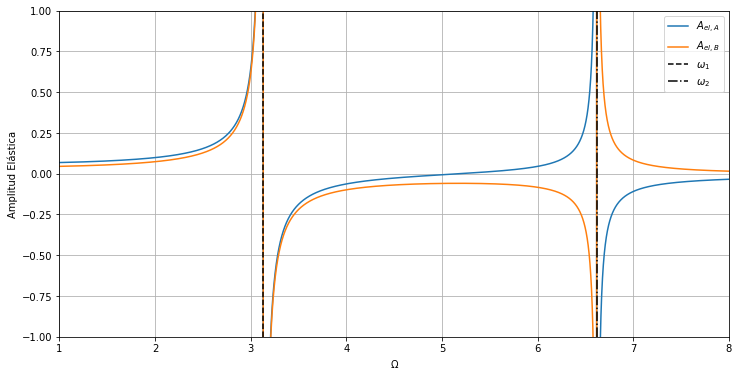

In [112]:
def graficar_amplitudes_forzado_estacionario_noroz(mA, mB, k, l, F0, OmegaMin, OmegaMax, g=9.8, Gamma=0.01):
    modos = calculo_modos_normales(mA, mB, k, l, g=g)
    (omega1, v1), (omega2, v2) = modos
    f0 = np.array([F0/mA, 0])
    (AelA, AabsA), (AelB, AabsB) = funciones_amplitudes_forzado_estacionario(modos, f0, Gamma)

    Omega = np.linspace(OmegaMin, OmegaMax, 8000)

    plt.figure(figsize=(12,6))
    plt.plot(Omega, AelA(Omega), label='$A_{el,A}$')
    plt.plot(Omega, AelB(Omega), label='$A_{el,B}$')
    plt.axvline(omega1, linestyle='--', color='black', label='$\omega_1$')
    plt.axvline(omega2, linestyle='-.', color='black', label='$\omega_2$')
    plt.xlim([1, 8])
    plt.ylim([-1, 1])
    plt.grid()
    plt.xlabel('$\Omega$')
    plt.ylabel('Amplitud Elástica')
    plt.legend()
    plt.show()

graficar_amplitudes_forzado_estacionario_noroz(mA=1, mB=1, k=17, l=1, F0=1, OmegaMin=0, OmegaMax=10, Gamma=0)

In [119]:
def animacion_soluciones_forzado_estacionario(mA, mB, k, l, F0, Gamma, OmegaMin, OmegaMax, g=9.8):
    modos = calculo_modos_normales(mA, mB, k, l, g=g)
    f0 = np.array([F0/mA, 0])

    nOmega = 10
    Omega = np.linspace(OmegaMin, OmegaMax, nOmega)
    nt = 50
    nT = nt*nOmega
    tmax = 0

    psiAt = np.zeros(nT)
    psiBt = np.zeros(nT)
    Omegat = np.zeros(nT)
    t = np.zeros(nT)
    for i in range(len(Omega)):
        psiA, psiB = funciones_posicion_masas_forzado_estacionario(modos, f0, Omega[i], Gamma)
        tf = 6 * np.pi / Omega[i]
        ts = np.linspace(0, tf, nt)
        tmax += ts[-1]
        t[i*nt:(i+1)*nt] = ts
        psiAt[i*nt:(i+1)*nt] = psiA(ts)
        psiBt[i*nt:(i+1)*nt] = psiB(ts)
        Omegat[i*nt:(i+1)*nt] = Omega[i]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    ax1.set_xlim([0, tmax])
    ax1.set_ylim([np.min([psiAt, psiBt]), np.max([psiAt, psiBt])])
    lineA, = ax1.plot([], [], label='$\psi_{A}$')
    lineB, = ax1.plot([], [], label='$\psi_{A}$')
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('Despalazamiento')

    L = np.max([psiAt, psiBt])
    posEqA = L
    posEqB = 3*L
    ax2.set_xlim([0, 4*L])
    ax2.set_ylim([0, 1])
    lineTecho, = ax2.plot([0, 4*L], [0.9, 0.9], '-', color='black', linewidth=3.0)
    linePendA, = ax2.plot([posEqA, posEqA], [0.9, 0.1], '-', color='C0', linewidth=2.0)
    linePendB, = ax2.plot([posEqB, posEqB], [0.9, 0.1], '-', color='C1', linewidth=2.0)
    lineResor, = ax2.plot([posEqA, posEqB], [0.1, 0.1], '--', color='gray', linewidth=1.5)
    masaPendA, = ax2.plot([posEqA], [0.1], 'o', color='C0', markersize=10.0)
    masaPendB, = ax2.plot([posEqB], [0.1], 'o', color='C1', markersize=10.0)

    fig.tight_layout()

    def init():
        lineA.set_data([], [])
        lineB.set_data([], [])
        linePendA.set_xdata([posEqA, posEqA])
        linePendB.set_xdata([posEqB, posEqB])
        lineResor.set_xdata([posEqA, posEqB])
        masaPendA.set_xdata([posEqA])
        masaPendB.set_xdata([posEqB])
        return lineA, lineB, linePendA, linePendB, masaPendA, masaPendB

    def animate(i):
        lineA.set_data(t[:i], psiAt[:i])
        lineB.set_data(t[:i], psiBt[:i])
        linePendA.set_xdata([posEqA, psiAt[i] + posEqA])
        linePendB.set_xdata([posEqB, psiBt[i] + posEqB])
        lineResor.set_xdata([psiAt[i] + posEqA, psiBt[i] + posEqB])
        masaPendA.set_xdata([psiAt[i] + posEqA])
        masaPendB.set_xdata([psiBt[i] + posEqB])
        return lineA, lineB, linePendA, linePendB, masaPendA, masaPendB

    anim = animation.FuncAnimation(fig, animate, frames=nT, interval=100, blit=True, init_func=init)
    #HTML(anim.to_jshtml())
    return anim